# BOREAL CONTROL CODE TO FIND RETRIEVAL UNCERTAINTY 

## Imports

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.chrome.service import Service
import utils
import os
import time
import math
from itertools import product
from utils import rename_files
from tqdm import tqdm
import numpy as np
# %pip install matplotlib.pyplot
import matplotlib.pyplot as plt


## Chrome Preferences 

In [2]:
download_path = "/Users/dada/Documents/RESULTS/Results_BCN21thMarch2024"
chrome_options = Options()
prefs = {
    "download.default_directory": download_path,
    "download.prompt_for_download": False,
    "download.directory_upgrade": True,
    "safebrowsing.enabled": True
}
chrome_options.add_experimental_option("prefs", prefs)
# Headless option is used to use Selenium in headless mode 
chrome_options.add_argument("--headless")
chrome_options.add_argument("--disable-gpu")  # Disables GPU hardware acceleration. If software renderer is not in place, then the headless browser will not launch on Windows.
chrome_options.add_argument("--no-sandbox")  # Bypass OS security model, MUST BE THE VERY FIRST OPTION.
chrome_options.add_argument("--disable-dev-shm-usage") # Overcome limited resource problems.

## Useful Paths and Input Parameters 

Directory where to save results: /Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_12_04_2024/TO_BE_TESTED
{'extinction': [1, 1, 0], 'backscatter': [1, 1, 1], 'particle depolarization': [1, 1, 0]}


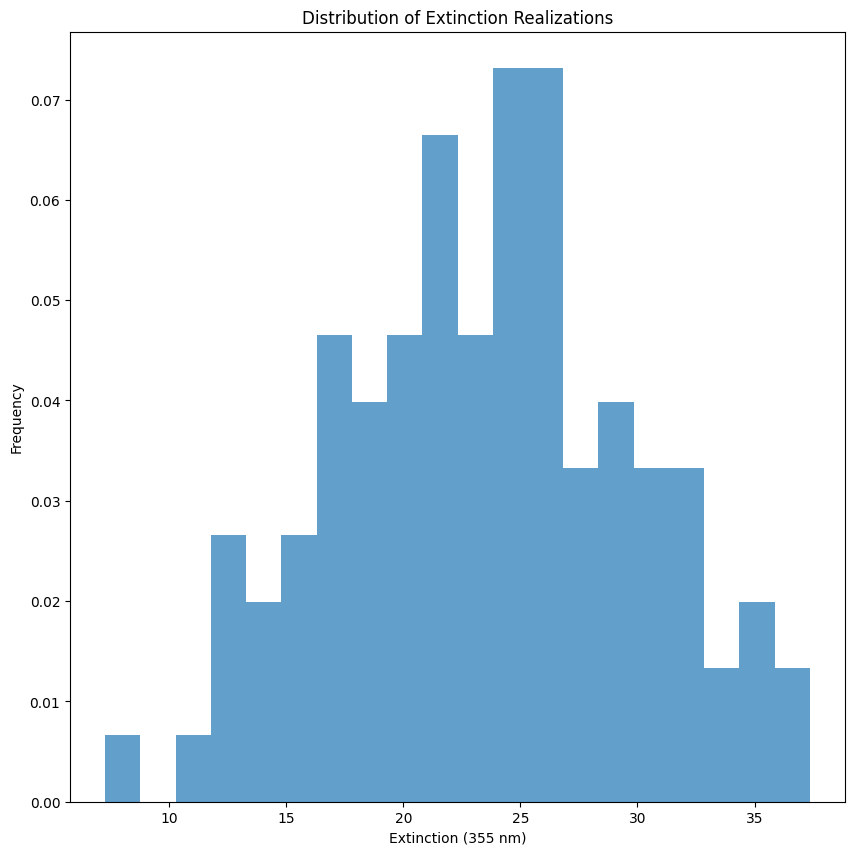

In [ ]:
directory = '/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_12_04_2024/TO_BE_TESTED'
print(f'Directory where to save results: {directory}')

################## SELECT WAVELENGTHS TO BE CONSIDERED ################## 
wavelengths_to_select = {
    'extinction' : [1,1,0],
    'backscatter' : [1,1,1],
    'particle depolarization' : [1,1,0],
} 
print(wavelengths_to_select)
################## INPUT VALUES #########################################
# # Barcelona 12th April 2024 
# ext_355 = { 
#     'value' : 23.198,
#     'error' : 0.2690,
# }
# ext_532 = {
#     'value' : 27.618,
#     'error' : 0.2970,
# }
# back_355 = {
#     'value' : 0.52973,
#     'error' : 0.0613,
# }
# back_532 = {
#     'value' : 0.58056,
#     'error' : 0.0455,
# }
# back_1064 = {
#     'value' : 0.36536,
#     'error' : 0.2049,
# }
# pd_355 = {
#     'value' : 0.3710,
#     'error' : 0.2259,
# }
# pd_532 = {
#     'value' : 0.4365,
#     'error' : 0.1199,
# }

# Lille 30th May 2024
ext_355 = { 
    'value' : 139.8,
    'error' : 0.0422,
}
ext_532 = {
    'value' : 77.305,
    'error' : 0.0469,
}
back_355 = {
    'value' : 3.0558,
    'error' : 0.0746,
}
back_532 = {
    'value' : 1.1371,
    'error' : 0.0133,
}
################## GENERATE REALIZATIONS ################################
n = 100  
np.random.seed(0)
ext_355_realizations = np.random.normal(loc=ext_355['value'] , scale=ext_355['error']*ext_355['value'] , size=n)
ext_532_realizations = np.random.normal(loc=ext_532['value'] , scale=ext_532['error']*ext_532['value'] , size=n)

back_355_realizations = np.random.normal(loc=back_355['value'], scale=back_355['error']*back_355['value'], size=n)
back_532_realizations = np.random.normal(loc=back_532['value'], scale=back_532['error']*back_532['value'], size=n)
# back_1064_realizations = np.random.normal(loc=back_1064['value'], scale=back_1064['error']*back_1064['value'], size=n)

# pd_355_realizations = np.random.normal(loc=pd_355['value'] , scale=pd_355['error']*pd_355['value'] , size=n)
# pd_532_realizations = np.random.normal(loc=pd_532['value'] , scale=pd_532['error']*pd_532['value'] , size=n)

figure = plt.figure(figsize=(10,10))
plt.hist(ext_355_realizations, bins=20, density=True, alpha=0.7)
plt.xlabel('Extinction (355 nm)')
plt.ylabel('Frequency')
plt.title('Distribution of Extinction Realizations')
plt.show()

In [ ]:
ext_355_mean = np.mean(ext_355_realizations)
ext_355_std = np.std(ext_355_realizations)
ext_355_error = ext_355_std/ext_355_mean
print(f'Extinction 355: value = {ext_355_mean}, error = {ext_355_error}')

ext_532_mean = np.mean(ext_532_realizations)
ext_532_std = np.std(ext_532_realizations)
ext_532_error = ext_532_std/ext_532_mean 
print(f'Extinction 532: value = {ext_532_mean}, error = {ext_532_error}')

back_355_mean = np.mean(back_355_realizations)
back_355_std = np.std(back_355_realizations)
back_355_error = back_355_std/back_355_mean
print(f'Backscatter 355: value = {back_355_mean}, error = {back_355_error}')

back_532_mean = np.mean(back_532_realizations)
back_532_std = np.std(back_532_realizations)
back_532_error = back_532_std/back_532_mean
print(f'Backscatter 532: value = {back_532_mean}, error = {back_532_error}')

# back_1064_mean = np.mean(back_1064_realizations)
# back_1064_std = np.std(back_1064_realizations)
# back_1064_error = back_1064_std/back_1064_mean
# print(f'Backscatter 1064: value = {back_1064_mean}, error = {back_1064_error}')

# pd_355_mean = np.mean(pd_355_realizations)
# pd_355_std = np.std(pd_355_realizations)
# pd_355_error = pd_355_std/pd_355_mean
# print(f'PD 355: value = {pd_355_mean}, error = {pd_355_error}')

# pd_532_mean = np.mean(pd_532_realizations)
# pd_532_std = np.std(pd_532_realizations)
# pd_532_error = pd_532_std/pd_532_mean
# print(f'PD 532: value = {pd_532_mean}, error = {pd_532_error}')



Extinction 355: value = 23.571217686635254, error = 0.2668275078442661
Extinction 532: value = 28.290715165155788, error = 0.2999890102327079
Backscatter 355: value = 0.5278065834398216, error = 0.05857042610517163
Backscatter 532: value = 0.5753615205341707, error = 0.04266771530787501
Backscatter 1064: value = 0.364419414356914, error = 0.21306530799368642
PD 355: value = 0.35399257779950305, error = 0.24077267157386273
PD 532: value = 0.42943722892339353, error = 0.12223914001697085


In [ ]:
ext_355_realizations.shape

## Main 

In [5]:
# ##### FIRST REALIZATION ####
# extinction = {
#     'value' : [23.198, 27.618],
#     # 'error' : [0.1, 0.1],
#     'error' : [0.2690, 0.2970],
# }
# backscatter = {
#     'value' : [0.52973, 0.58056, 0.36536],
#     # 'error' : [0.1, 0.1, 0.1],
#     'error' : [0.0613, 0.0455, 0.2049],
# }
# particle_depolarization = {
#     'value' : [0.3710, 0.4365],
#     # 'error' : [0.1, 0.1],
#     'error' : [0.2259, 0.1199],
# }

#### AVERAGE VALUES ####
extinction = {
    'value' : [ext_355_mean, ext_532_mean],
    # 'error' : [0.1, 0.1],
    'error' : [ext_355_error, ext_532_error],
}
backscatter = {
    'value' : [back_355_mean, back_532_mean, back_1064_mean],
    # 'error' : [0.1, 0.1, 0.1],
    'error' : [back_355_error, back_532_error, back_1064_error],
}
particle_depolarization = {
    'value' : [pd_355_mean, pd_532_mean],
    # 'error' : [0.1, 0.1],
    'error' : [pd_355_error, pd_532_error],
}

driver = webdriver.Chrome(options=chrome_options)
# driver = webdriver.Chrome()
driver.get("https://boreal.loa.univ-lille.fr/")
utils.press_button(driver,'clear') # Clear input parameters
# utils.press_button(driver,'debug') # Allow debug

################## INSERTING INPUT PARAMETERS #########################################
# Select aerosol type
utils.select_aerosol_type(driver, 'dust') 
# Select particle shape model
utils.select_particle_shape_model(driver, 'spheroid') 
# Select wavlengths 
utils.select_wavelengths(driver, wavelengths_to_select)
# Insert extinctions
utils.input_extinction(driver, extinction)
# Insert backscatters
utils.input_backscatter(driver, backscatter)
# Insert particle depolarization ratios
utils.input_pd(driver, particle_depolarization)
################### STARTING INVERSION ##########################################
utils.press_button(driver,'submit')
# time.sleep(60) 
WebDriverWait(driver, 300).until(EC.visibility_of_element_located((By.XPATH, "//pre[contains(text(), 'Finished the inversion at')]")))
################### SAVING RESULTS ##############################################
output_link = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.PARTIAL_LINK_TEXT, "Output results in text format")))
output_link.click()
time.sleep(2)
driver.switch_to.window(driver.window_handles[1])
full_text_content = driver.find_element(By.TAG_NAME,'body').text

# Save the extracted part to a file
if not os.path.exists(directory):
    os.makedirs(directory)
# file_path = os.path.join(directory, 'Case01_110_111_110.txt')
file_path = os.path.join(directory, f'Realization_with_avg_values_from_realizations.txt')
with open(file_path, 'w') as file:
    file.write(full_text_content)

driver.close()
driver.switch_to.window(driver.window_handles[0])

## 100 RANDOM REALIZATIONS 

In [ ]:
for i in tqdm(range(n), desc='100 realizations'):
    utils.press_button(driver,'clear') # Clear input parameters
    extinction = {
    'value' : [ext_355_realizations[i], ext_532_realizations[i]],
    'error' : [0.2690, 0.2970],
    # 'error' : [0.1, 0.1]
    }
    backscatter = {
        'value' : [back_355_realizations[i], back_532_realizations[i], back_1064_realizations[i]],
        'error' : [0.0613, 0.0455, 0.2049],
        # 'error' : [0.1, 0.1, 0.1]
    }
    particle_depolarization = {
        'value' : [pd_355_realizations[i], pd_355_realizations[i]],
        'error' : [0.2259, 0.1199],
        # 'error' : [0.1, 0.1]
    }
    print(f'Realization: {i+2}')

    print(f'Starting with input parameters:')
    print(f'Extinctions: {extinction}')
    print(f'Backscatter: {backscatter}')
    print(f'Particle depolarizations: {particle_depolarization}')
    time.sleep(120)
    # Select wavlengths 
    utils.select_wavelengths(driver, wavelengths_to_select)
    # Insert extinctions
    utils.input_extinction(driver, extinction)
    # Insert backscatters
    utils.input_backscatter(driver, backscatter)
    # Insert particle depolarization ratios
    utils.input_pd(driver, particle_depolarization)
    ################### STARTING INVERSION ##########################################
    utils.press_button(driver,'submit') 
    WebDriverWait(driver, 300).until(EC.visibility_of_element_located((By.XPATH, "//pre[contains(text(), 'Finished the inversion at')]")))
    ################### SAVING RESULTS ##############################################
    time.sleep(60)
    output_link = WebDriverWait(driver, 50).until(EC.element_to_be_clickable((By.PARTIAL_LINK_TEXT, "Output results in text format")))
    output_link.click()
    time.sleep(2)
    driver.switch_to.window(driver.window_handles[1])
    full_text_content = driver.find_element(By.TAG_NAME,'body').text
    if not os.path.exists(directory):
            os.makedirs(directory)
    filename = f'{directory}/Realization_{i+2}.txt'

    # Save the extracted part to a file
    with open(filename, 'w') as file:
        file.write(full_text_content)

    driver.close()
    driver.switch_to.window(driver.window_handles[0])

driver.quit()


In [ ]:
driver.quit()